In [ ]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


/bin/bash: https://github.com/AlvaroCavalcante/auto_annotate.git: No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Weapon detection/images')
if os.path.isdir('test/knife') is False:
    os.makedirs('train/gun')
    os.makedirs('train/knife')
    os.makedirs('valid/gun')
    os.makedirs('valid/knife')
    os.makedirs('test/gun')
    os.makedirs('test/knife')

    for c in random.sample(glob.glob('Database_1 - Copy_original_tryImagegun_*'), 500):
        shutil.move(c, 'train/gun')
    for c in random.sample(glob.glob('MyImagNew_original_tryImageknife_*'), 500):
        shutil.move(c, 'train/knife')
    for c in random.sample(glob.glob('Database_1 - Copy_original_tryImagegun_*'), 100):
        shutil.move(c, 'valid/gun')
    for c in random.sample(glob.glob('MyImagNew_original_tryImageknife_*'), 100):
        shutil.move(c, 'valid/knife')
    for c in random.sample(glob.glob('Database_1 - Copy_original_tryImagegun_*'), 50):
        shutil.move(c, 'test/gun')

    for c in random.sample(glob.glob('MyImagNew_original_tryImageknife_*'), 50):
        shutil.move(c, 'test/knife')
    

In [ ]:
train_path = '/content/drive/MyDrive/Weapon detection/images/train'
valid_path = '/content/drive/MyDrive/Weapon detection/images/valid'
test_path = '/content/drive/MyDrive/Weapon detection/images/test'

In [ ]:
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['gun', 'knife'], batch_size = 10)
valid_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['gun', 'knife'], batch_size = 10)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224), classes=['gun', 'knife'], batch_size = 10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
assert train_batch.n == 1000
assert valid_batch.n == 200
assert test_batch.n == 100

In [ ]:
imgs, labels = next(train_batch)

In [ ]:
def plotimages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip (images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

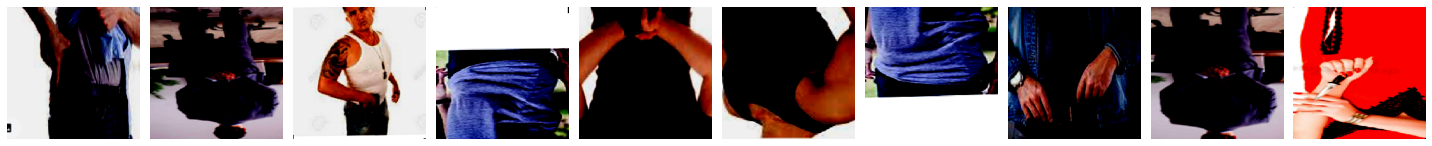

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
plotimages(imgs)
print(labels)

In [ ]:
import numpy as np 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, Dense, Dropout, Flatten 
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import cv2

In [ ]:
resnet50_model = tf.keras.applications.ResNet50()

102981632/102967424 [==============================] - 0s 0us/step


In [ ]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
type(resnet50_model)

keras.engine.functional.Functional

In [ ]:
x = resnet50_model.layers[-2].output
output = Dense(units=2 , activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(inputs=resnet50_model.input, outputs=output)

In [ ]:
for layer in model.layers[:-50]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import datetime

early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=10, min_delta = .00075)
model_checkpoint = ModelCheckpoint('ModelWeights/CNN-ModelCheckpointWeights1.h5', verbose = 1, save_best_only=True,
                                  monitor = 'val_loss')
lr_plat = ReduceLROnPlateau(patience = 2, mode = 'min')
epochs = 1000
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)



history = model.fit(x = train_batch, 
            epochs = epochs, 
     callbacks = [early_stopping, model_checkpoint, lr_plat, tb_callback], validation_data = valid_batch, verbose= 1)

Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 0.5428 - accuracy: 0.7320
Epoch 1: val_loss improved from inf to 0.50756, saving model to ModelWeights/CNN-ModelCheckpointWeights1.h5
100/100 [==============================] - 208s 2s/step - loss: 0.5428 - accuracy: 0.7320 - val_loss: 0.5076 - val_accuracy: 0.7300 - lr: 1.0000e-04
Epoch 2/1000
100/100 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.8680
Epoch 2: val_loss improved from 0.50756 to 0.37993, saving model to ModelWeights/CNN-ModelCheckpointWeights1.h5
100/100 [==============================] - 15s 151ms/step - loss: 0.3051 - accuracy: 0.8680 - val_loss: 0.3799 - val_accuracy: 0.8550 - lr: 1.0000e-04
Epoch 3/1000
100/100 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.8800
Epoch 3: val_loss did not improve from 0.37993
100/100 [==============================] - 13s 129ms/step - loss: 0.2840 - accuracy: 0.8800 - val_loss: 0.6467 - val_accuracy: 0.7650 - lr:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

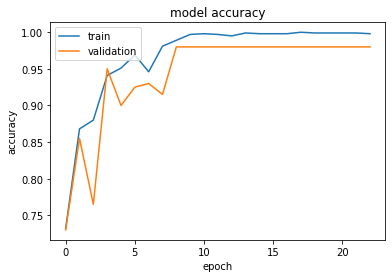

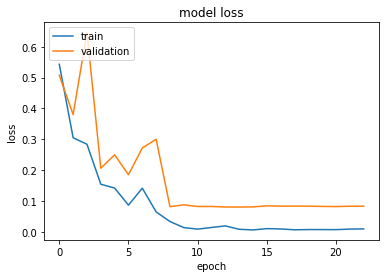

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import os.path
if os.path.isfile('/content/drive/MyDrive/Weapon detection/resnet101model.h5') is False:
  model.save("/content/drive/MyDrive/Weapon detection/resnet101model.h5")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

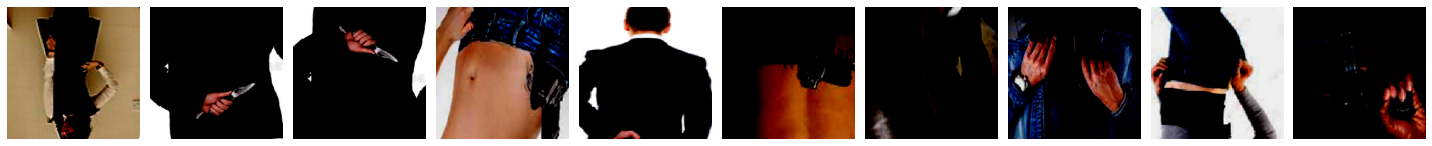

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_imgs, test_labels = next(test_batch)
plotimages(test_imgs)
print(test_labels)

In [ ]:
test_batch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
predictions = model.predict(x=test_batch, verbose=0)

In [ ]:
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true=test_batch.classes, y_pred= np.argmax(predictions, axis=-1))

In [ ]:
import numpy as np
def plot_confusion_metrix(cm, classes,
                          normalize=False,
                          title='Confusion marix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion matrix, without Normalization')

  print(cm)

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


In [ ]:
test_batch.class_indices

{'gun': 0, 'knife': 1}

Confusion matrix, without Normalization
[[21 29]
 [31 19]]


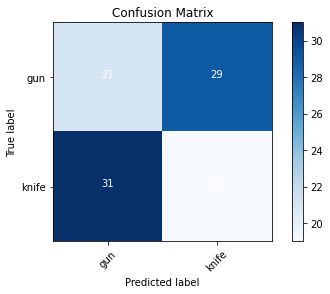

In [ ]:
cm_plot_labels = ['gun', 'knife']
plot_confusion_metrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')